In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

# Data Load: Load banglore home prices into a dataframe

In [4]:
df=pd.read_csv("bengaluru_house_prices.csv")
df.head() 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

#### Drop features that are not required to build our model

In [8]:
df1=df.drop(['availability','society','area_type'],axis='columns')
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


# Data Cleaning: Handle NA values

In [9]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
df1.balcony.fillna(0,inplace=True)
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [11]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df2.shape

(13246, 6)

In [13]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
#the same multiple names for same meaning words

# Feature Engineering

#### Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [15]:
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\hp\AppData\Local\Temp\ipykernel_13652\3716419620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


In [16]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [17]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
df2.drop(['size'],axis='columns',inplace=True)
df2.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_13652\2186782254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['size'],axis='columns',inplace=True)


,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [19]:
df2[df2.bhk>20]

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


#### Explore total_sqft feature

In [20]:
#for 2400 total_sqrt 43 bedroom is not possible ,we need to clean up the errors

In [21]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
#the range shd be replaced with the average of the two

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,4125Perch,9.0,0.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion.drop such corner cases to keep things simple

In [25]:
#we need to do data cleaning

In [26]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [27]:
convert_sqft_to_num('2166')

2166.0

In [28]:
convert_sqft_to_num('34.123Sq. Meter')

In [29]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num) #applying to all the data by calling the function
df3.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3


In [30]:
df3.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [31]:
df3[df3.total_sqft== '34.123Sq. Meter'] #(checking if present or not) => not present

,location,total_sqft,bath,balcony,price,bhk


#### Add new feature called price per square feet

In [32]:
#price per square feet is very important
df4=df3.copy()
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df4.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [33]:
df4.location=df4.location.apply(lambda x:x.strip())
loc_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [34]:
len(loc_stats)

1293

# Dimensionality Reduction

#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [35]:
# we cannot give a unique number of all 1293 locations hence those locations which are appearing less than 10 times can be named as others

In [36]:
len(loc_stats[loc_stats<10])

1039

In [37]:
loc_stats_less_than_10=loc_stats[loc_stats<10]
loc_stats_less_than_10.head()

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
Name: location, dtype: int64

In [38]:
df4.location=df4.location.apply(lambda x:'other' if x in loc_stats_less_than_10 else x)

In [39]:
df4.head(20)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,0.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,0.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,1020.0,6.0,0.0,370.00,6,36274.509804


In [40]:
len(df4.location.unique())

255

In [41]:
len(df3.location.unique())

1304

In [42]:
#outlier remover->extreme point (to filter the houses in which the bedroom size is less than 300sqft )

# Outlier Removal Using Business Logic

#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [43]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,1020.0,6.0,0.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,0.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000


In [44]:
df4.shape

(13246, 7)

In [45]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]

In [46]:
df5.shape

(12502, 7)

In [47]:
df5.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,0.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,0.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.888889


# Outlier Removal Using Standard Deviation and Mean

In [48]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [49]:
#the minimum price per sqft displaying in the data is 267 which is unlikely hence we need to remove these

In [50]:
# calculate the mean and standard deviation in all the location and if there are houses whose prices are less then the mean and standard deviation are removed 

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [51]:
def remove_ppsf_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [52]:
df6=remove_ppsf_outlier(df5)
print(df5.shape,df6.shape)

(12502, 7) (10222, 7)


In [53]:
#for the houses where  for the same sqft area the price of 2bhk is higher then the price of 2bhk

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [101]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) &(df.bhk==2)]
    bhk3=df[(df.location==location) &(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=20)#s=markersize
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3bhk',s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()

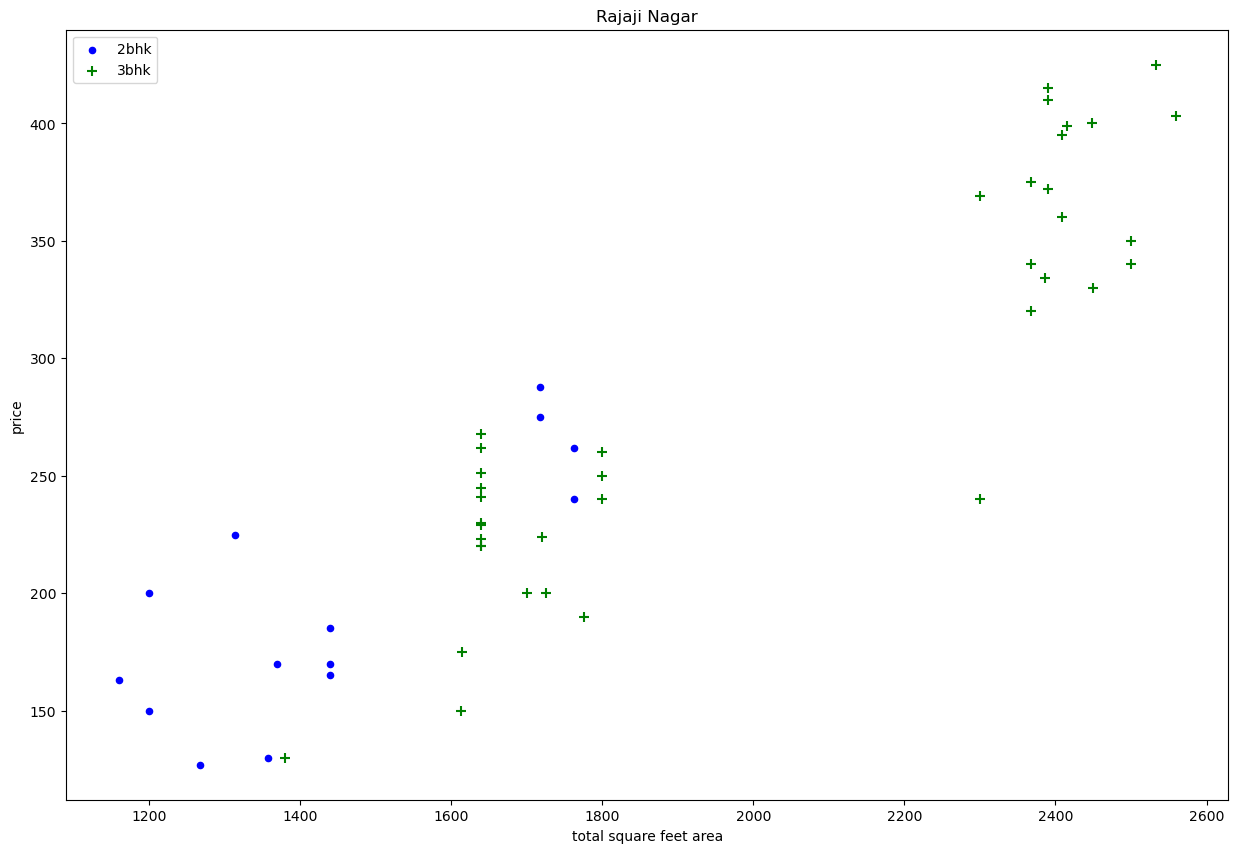

In [102]:
plot_scatter_chart(df6,"Rajaji Nagar")

#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [56]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for loc,loc_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in loc_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [57]:
# for loc,loc_df in df6.groupby('location'):
#     print(loc,loc_df)

In [58]:
df7=remove_bhk_outliers(df6)
df7.shape

(7369, 7)

#### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

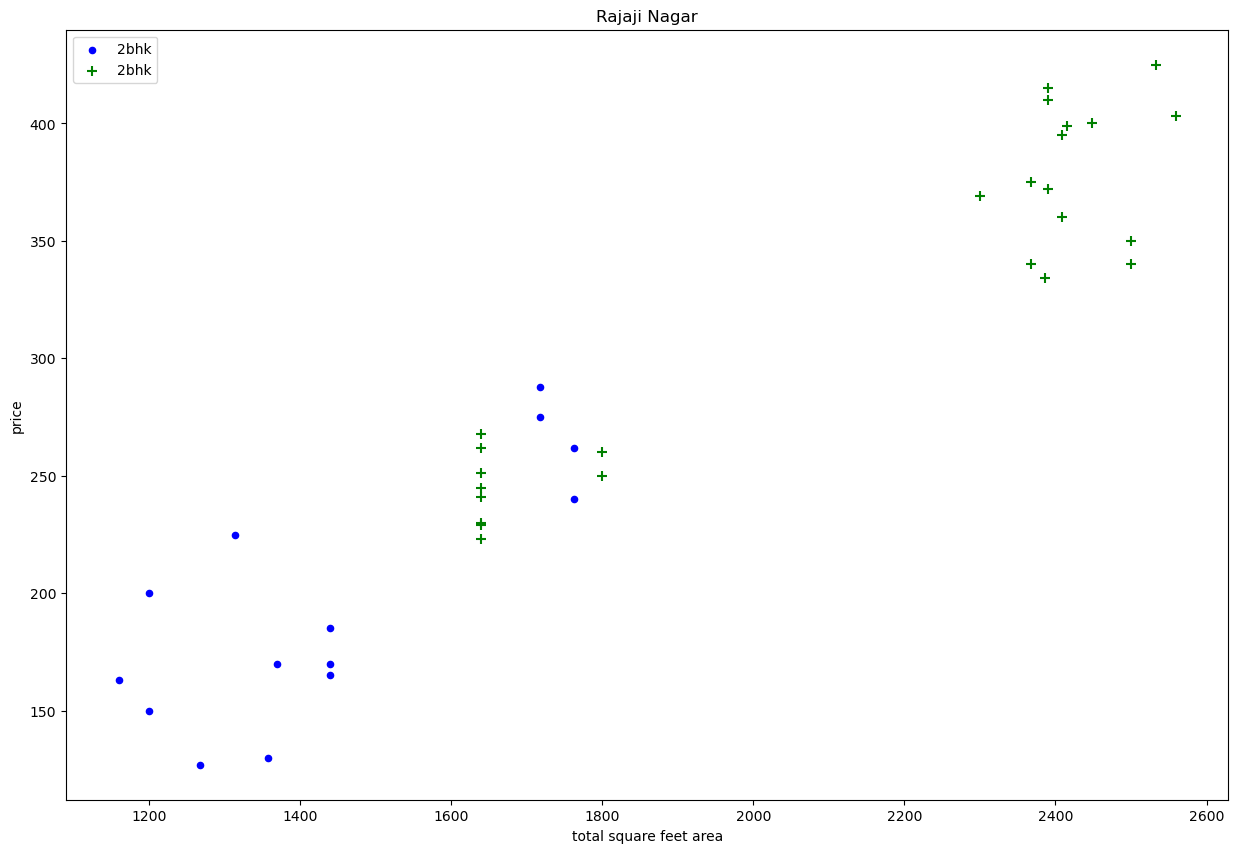

In [59]:
plot_scatter_chart(df7,"Rajaji Nagar")

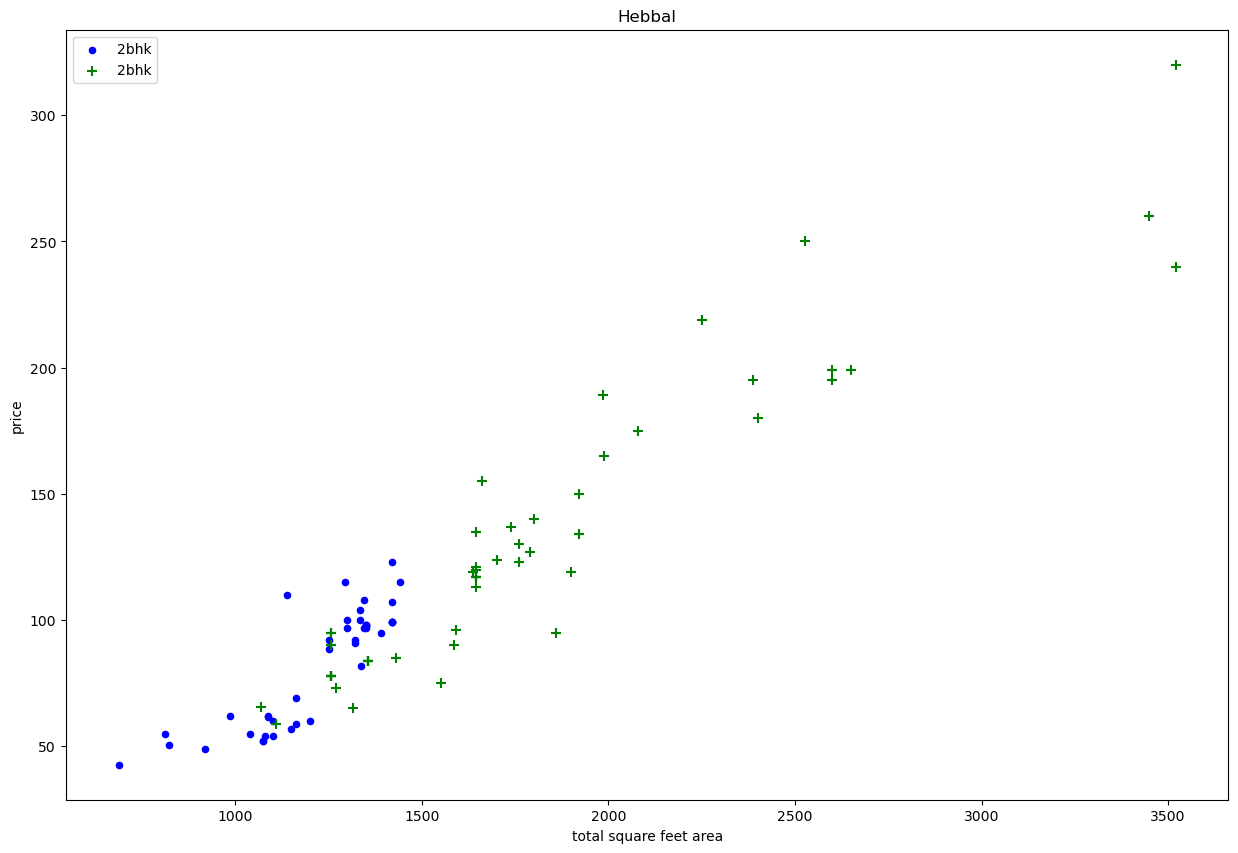

In [60]:
plot_scatter_chart(df6,"Hebbal")

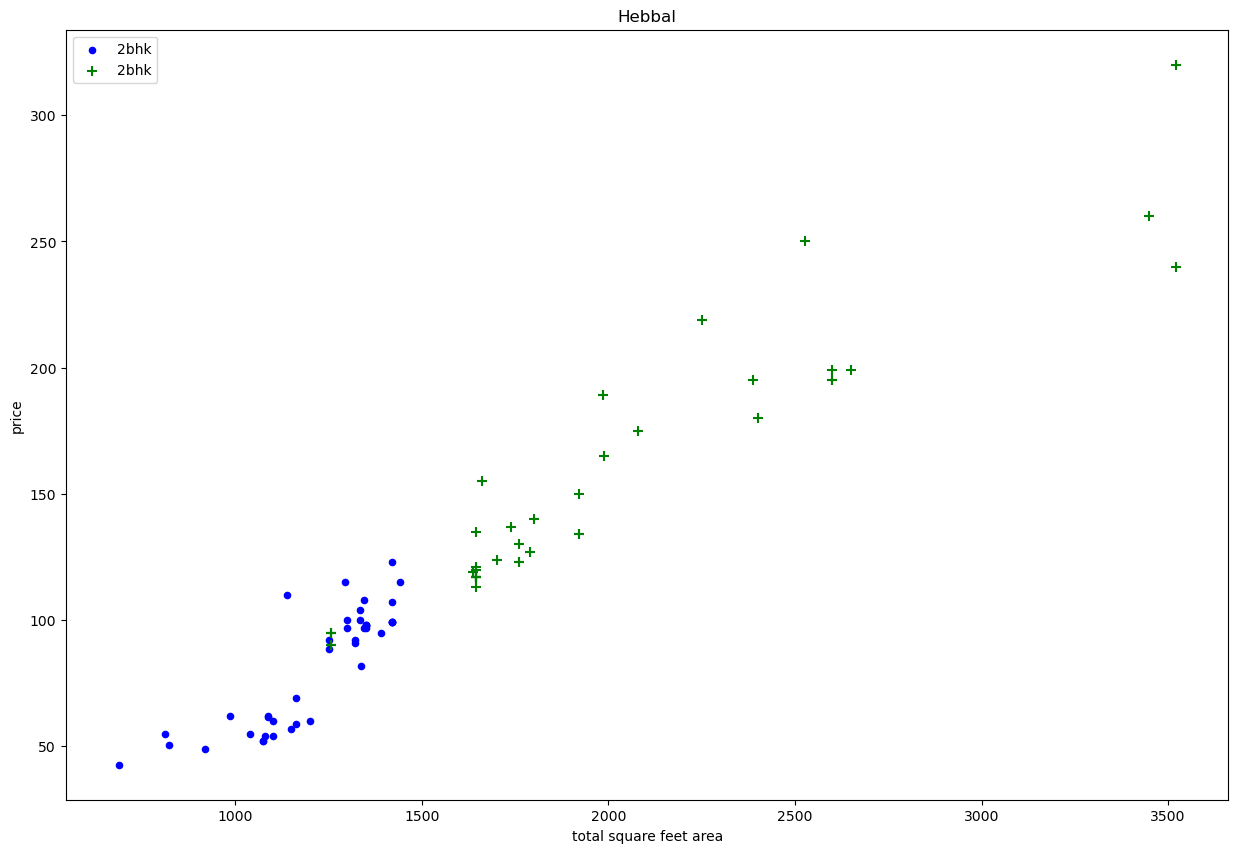

In [61]:
plot_scatter_chart(df7,"Hebbal")

<img src="2023-04-04 (1).png" width="800" height="600">

<img src="2023-04-04 (2).png" width="800" height="600">

# Outlier Removal Using Bathrooms Feature

In [62]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [63]:
df7[df7.bath>10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
585,BTM 1st Stage,3300.0,14.0,0.0,500.0,9,15151.515152
5344,Neeladri Nagar,4000.0,12.0,0.0,160.0,10,4000.000000
8547,other,12000.0,12.0,0.0,525.0,10,4375.000000
8633,other,10000.0,16.0,0.0,550.0,16,5500.000000
9329,other,6000.0,12.0,0.0,150.0,11,2500.000000
9642,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [64]:
#for 11 bhk having 12 bathroom is fair enough but having 12 bathrooms for 9bhk is not fair
#hence if the bathroom is greater than bedroom+2 then it shd be removed

#### It is unusual to have 2 more bathrooms than number of bedrooms in a home

#### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [65]:
df8=df7[df7.bath<=df7.bhk+2]
df8.shape

(7364, 7)

In [66]:
df8.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


# Use One Hot Encoding For Location

In [67]:
dummies=pd.get_dummies(df8.location)
dummies.head(10)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df9=pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')

In [69]:
df9.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
len(df9['location'].unique())

255

In [71]:
df9.shape

(7364, 261)

In [72]:
df10=df9.drop('location',axis='columns')
df10.head()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# now the data is pretty clean
# we can now train the model using machine learning

# <font color=green>Build a Model Now...</font>

In [150]:
X=df10.drop(['price','price_per_sqft'],axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
y=df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [153]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7835275335297763

# <font color=green>Use K Fold cross validation to measure accuracy of our LinearRegression model</font>

In [154]:
from sklearn.model_selection import ShuffleSplit,cross_val_score 

In [155]:
cv=ShuffleSplit(n_splits=5,test_size=.2,random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81650048, 0.83669449, 0.84544011, 0.88284728, 0.90035656])

#### for cross validation KFold,  StratifiedKFold,   ShuffleSplit,  StratifiedShuffleSplit can be used

In [137]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [156]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

GrisSearchCV not only tells the best algorithm(model) but also best paramter 

In [157]:
find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.856368,{'normalize': False}
1,lasso,0.699312,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.779763,"{'criterion': 'mse', 'splitter': 'random'}"


##### linear and decision tree gave the best result

# <font color=green>Test the model for few properties</font>

In [158]:
lr.fit(X_train,y_train)

LinearRegression()

In [160]:
lr.predict([[1000.,    1.,    2. ,   2. ,   0. ,   1.    ,0.  ,  0.  ,  0. ,   0.    ,0. ,   0.,
    0.    ,0.    ,0. ,   0.  ,  0.   , 0.,    0.    ,0.,    0.    ,0.,    0.    ,0.,
    0.    ,0.    ,0.,    0.    ,0.  ,  0. ,   0.   , 0. ,   0.    ,0.  ,  0.   , 0.,
    0.    ,0.    ,0.   , 0.  ,  0. ,   0.  ,  0.    ,0.  ,  0.   , 0. ,   0.  ,  0.,
    0.    ,0.    ,0.  ,  0.,    0.,    0.   , 0.   , 0.   , 0.  ,  0.,    0. ,   0.,
    0.    ,0.   , 0. ,   0. ,   0.   , 0.    ,0.  ,  0.    ,0. ,   0. ,   0.   , 0.,
    0.    ,0.  ,  0.,    0.  ,  0.  ,  0.,    0. ,   0.,    0.,    0.  ,  0.  ,  0.,
    0.    ,0. ,   0.   , 0.,    0. ,   0. ,   0.,    0. ,   0.   , 0.   , 0. ,   0.,
    0.    ,0.,    0.  ,  0. ,   0.,    0.  ,  0.   , 0.  ,  0.  ,  0.    ,0.,    0.,
    0.    ,0.   , 0. ,   0.  ,  0.   , 0.   , 0.  ,  0.   , 0. ,   0.,    0.   , 0.,
    0.    ,0.    ,0.,    0.   , 0.  ,  0.,    0. ,   0.,    0.,    0. ,   0.  ,  0.,
    0.    ,0.,    0.,    0.,    0. ,   0. ,   0.,    0. ,   0.    ,0.  ,  0. ,   0.,
    0.   , 0. ,   0. ,   0. ,   0.,    0.  ,  0.    ,0.  ,  0.   , 0.   , 0.,    0.,
    0.  ,  0.  ,  0.  ,  0.  ,  0.   , 0.   , 0.   , 0.    ,0.  ,  0.,    0.   , 0.,
    0.  ,  0.,    0.   , 0.   , 0.   , 0.,    0.  ,  0.   , 0. ,   0. ,   0.  ,  0.,
    0.  ,  0. ,   0.    ,0.  ,  0.   , 0. ,   0. ,   0.,    0.,    0.  ,  0. ,   0.,
    0.  ,  0.  ,  0. ,   0. ,   0.   , 0.  ,  0.,    0. ,   0.    ,0.   , 0.,    0.,
    0.  ,  0.   , 0.   , 0.   , 0.  ,  0.   , 0.   , 0.  ,  0.   , 0.,    0.   , 0.,
    0.  ,  0.,    0.  ,  0.  ,  0.  ,  0.,    0.  ,  0.   , 0.  ,  0. ,   0.  ,  0.,
    0. ,   0. ,   0. ,   0.    ,0. ,   0. ,   0. ,   0.    ,0. ,   0.  ,  0. ,   0.,
    0. ,   0.  ,  0.,    0.    ,0.,    0.  ,  0.,    0.   , 0.,    0.   , 0.,    0.,
    0.  ,  0.,    0.  ,  0.   , 0. ,   0. ]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([141.0540585])

In [161]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=258)

In [162]:
loc_index = np.where(X.columns=='1st Block Koramangala')[0][0]
print(loc_index)

5


#### if for 6 position if you assigned one that means it is first block Koramangala

In [163]:
def predict_price(location,sqft,bath,balcony,bhk):    #return estimated price
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

#### first position is total square feet second position is bathroom third is balcony fourth is BHK 5th is price per square feet

In [164]:
predict_price('1st Phase JP Nagar',1000,2,2,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.64989335964236

In [165]:
predict_price('Indira Nagar',1000,2,1,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


183.40379256739857

In [166]:
predict_price('Indira Nagar',1000,3,1,3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.45379328080506

In [167]:
predict_price('1st Phase JP Nagar',1000,3,2,3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.69989407304882

#  <font color=green>Export the tested model to a pickle file</font>

In [168]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

# <font color=green> Export location and column information to a file that will be useful later on in our prediction application</font>

In [169]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [170]:
x = np.zeros(len(X.columns))
# print(x)
x[0] = 1000
x[1] =1
x[2] = 2
x[3] =2
x[5] = 1
print(x)
lr.predict([x])[0]

[1000.    1.    2.    2.    0.    1.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


141.0540584985452